In [5]:
import pandas as pd

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tushare as ts
import futuquant as ft
import time

In [6]:
matplotlib.rcParams['font.family']= 'SimHei'

最差时基金定投相比于理财定投亏损: -53.00%，日期为2008-10-27
最好时基金定投相比于理财定投盈利: 76.54%，日期为2007-10-16


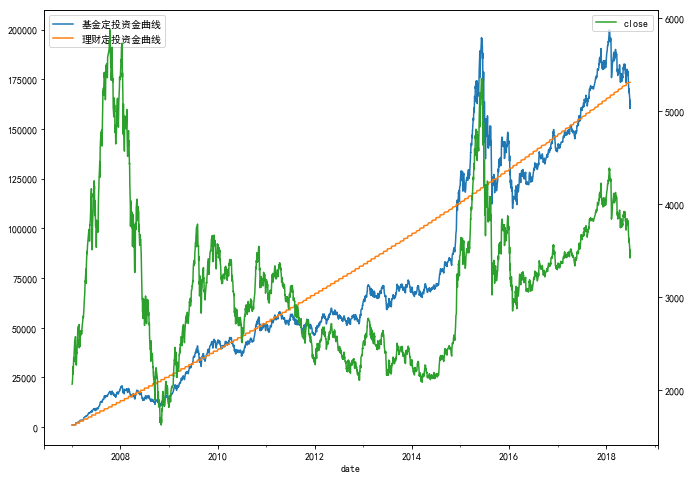

In [7]:
datas = ts.get_k_data('hs300',ktype = 'D',start = '2007-01-01',end='2018-07-01')
#datas = datas[['code','close']].sort_index()
#把列变成时间
datas['date'] = pd.to_datetime(datas['date'])
#把时间对角例,变成索引
datas = datas.set_index('date')
datas['无风险利率']= (4.0/100+1)**(1.0/250)-1
datas['无风险收益净值'] = (datas['无风险利率']+1).cumprod()
#取每个月的第一个交易日
by_month = datas.resample('M',kind='period').first()

trade_log = pd.DataFrame(index=by_month.index)
trade_log['基金净值'] = by_month['close']/1000
#每月月初投入1000元
trade_log['投入资金'] = 1000
#购买份额
trade_log['基金份额'] = trade_log['投入资金']/trade_log['基金净值']
trade_log['总基金份额'] = trade_log['基金份额'].cumsum()
trade_log['累计投入资金'] = trade_log['投入资金'].cumsum()
trade_log['理财份额'] = trade_log['投入资金']/by_month['无风险收益净值']
trade_log['理财总份额'] = trade_log['理财份额'].cumsum()
#重新采样转换为日历日
tem = trade_log.resample('D').ffill()

datas = datas.to_period('D')
#计算每个交易日的基金净值和资产
daily_data = pd.concat([datas, tem[['总基金份额', '理财总份额', '累计投入资金']]], axis=1, join='inner')
daily_data['基金定投资金曲线'] = daily_data['close'] / 1000 * daily_data['总基金份额']
daily_data['理财定投资金曲线'] = daily_data['无风险收益净值'] * daily_data['理财总份额']
daily = daily_data[['累计投入资金', '基金定投资金曲线', '理财定投资金曲线']].iloc[[0,-1],:]
temp = (daily_data['基金定投资金曲线'] / daily_data['理财定投资金曲线']-1).sort_values()
print ("最差时基金定投相比于理财定投亏损: %.2f%%，日期为%s" % (temp.iloc[0] * 100, str(temp.index[0])))
print ("最好时基金定投相比于理财定投盈利: %.2f%%，日期为%s" % (temp.iloc[-1] * 100, str(temp.index[-1])))
daily_data[['基金定投资金曲线', '理财定投资金曲线']].plot(figsize=(11,8))
daily_data['close'].plot(secondary_y=True)
plt.legend(['close'], loc='best')

In [15]:
daily_data.iloc[-1,:]

open            3431.96
close           3510.98
high            3512.38
low             3425.22
volume       7.7257e+07
code              hs300
无风险利率       0.000156895
无风险收益净值         1.55036
总基金份额           23409.4
理财总份额           55949.5
累计投入资金            69000
基金定投资金曲线        82189.8
理财定投资金曲线        86741.9
Name: 2018-06-29, dtype: object

In [18]:
#ts1 = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

#ts1 = ts1.cumsum()

c=[[1,2,3],[4,5,6],[7,8,9]]
df5 = pd.DataFrame(c, columns=list('ABC'))
df5 = df5.cumsum()
# plt.figure(1); df5.plot();
# plt.show()
df5

,A,B,C
0,1,2,3
1,5,7,9
2,12,15,18


In [3]:
(4.0/100+1)**(1.0/250)-1

0.0001568951593713397